In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.9MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=3969173c1752894ba2202056c8f779b38e2845db1fdb305887d0a5c1f291ca2c
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=29d9da1be05e6b50697955c076abe696053f670fedd9bc348342258b6595ca79
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/.shortcut-targets-by-id/1dI67RTtEW-SJRhnNRkrF26W-uhDV3Asg/Morgan Stanley Project/CRM_Analysis_Data


In [6]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [7]:
df = pd.read_json('pretty_ms_tweets_complaint.json')
#sample = pd.read_csv('TwitterData.csv')



In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [10]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [11]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

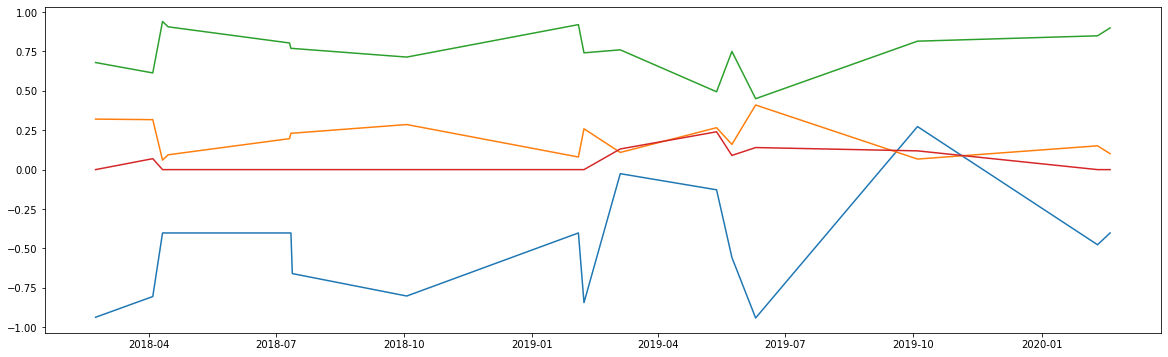

In [12]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [13]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'ouch. though you have to wonder if personal bias is creeping in here, given Adam Jonas @MorganStanley complaints the other day eg "send that tape.."'

In [14]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Love @Amazon hoping they will fix CST @AmazonHelp, stop eavesdropping, stop fake products review, stop cut/paste email responses by e-reps as if they care when complaints sent to jeff@amazon.com\n\nAs Amazon sprawls, its Facebook-like problems mount \n\nhttps://www.wsj.com/articles/amazons-size-is-becoming-a-problemfor-amazon-11557547211?emailToken=354581ce1f69f35bbfa9fabb6c96b4f4wzsQkKcEIR3cHeuOCTE5aoTToBmWpVUyv+juD+d6bDWEg8Z0EPsW1rObIx3loXeLKJsmiTNq31FRCCqUhmGbPSr2dk8GzuCPGWqmjAgDTnI%3D&reflink=article_imessage_share\xa0… @wsjpic.twitter.com/SKuxS96rzc'

Text(0, 0.5, 'Sentiment')

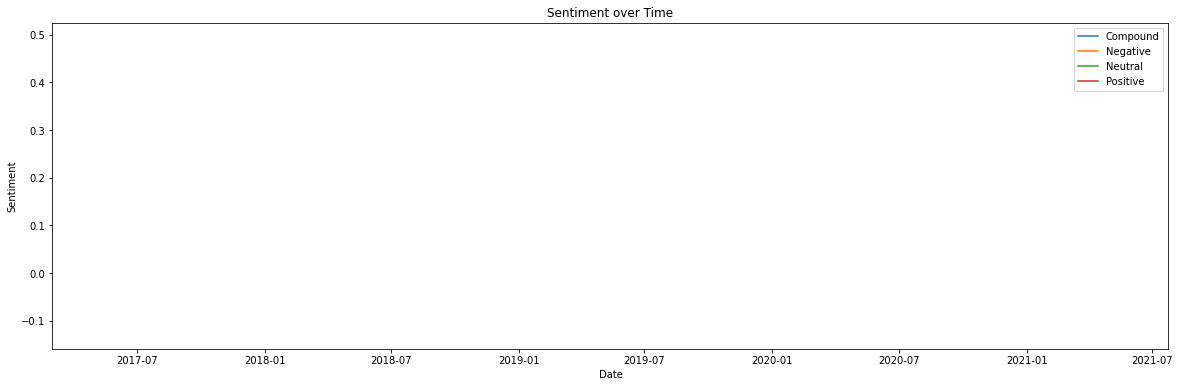

In [15]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

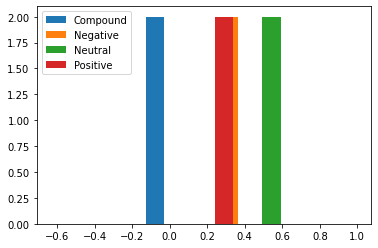

In [16]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

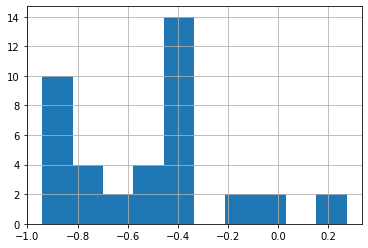

In [17]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [18]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.849,0.000,-0.4767
1,0.849,0.000,-0.4767
2,0.899,0.000,-0.4019
3,0.899,0.000,-0.4019
4,0.714,0.000,-0.8020
5,0.714,0.000,-0.8020
6,0.760,0.131,-0.0258
7,0.760,0.131,-0.0258
8,0.815,0.119,0.2732
9,0.815,0.119,0.2732


In [19]:
#Importing Various twitter data
# all JP files
#Complaint
df_= pd.read_json('pretty_ms_tweets_complaint.json')


In [20]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 15.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=57dcdc8942b289c4add5e0b4fd21146b4ea6781618f2efec6d51ea7d92fe08fe
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=36c1021cc371167931e10cddba9c03cca4cc1ed954ec98fbcda79ec28c98f83e
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 10, 
                                min_df = 1)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(40, 275)


In [24]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [ ]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [25]:
sentiment_wm = df_['text'].apply(lambda x: analyzer.polarity_scores(x))
df_ = pd.concat([df_, sentiment_wm.apply(pd.Series)],1)

In [26]:
df_.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,True,1,[],1226891812788408322,0,"[{'screen_name': 'MikeMartinez_AN', 'user_id':...",0,chrislemley,ouch. though you have to wonder if personal bi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-10 16:42:22,2020-02-10 16:42:22,1226909280730800128,/chrislemley/status/1226909280730800130,32506384,Chris Lemley,,0.151,0.849,0.0,-0.4767
1,False,[],[],False,True,1,[],1226891812788408322,0,"[{'screen_name': 'MikeMartinez_AN', 'user_id':...",0,chrislemley,ouch. though you have to wonder if personal bi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-10 16:42:22,2020-02-10 16:42:22,1226909280730800128,/chrislemley/status/1226909280730800130,32506384,Chris Lemley,,0.151,0.849,0.0,-0.4767
2,False,[],[],False,True,1,[],1229752318343684096,0,"[{'screen_name': 'daviddo43706820', 'user_id':...",0,daviddo43706820,Go to finra about james nicholas and see the r...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:42:22,2020-02-19 23:42:22,1230276469730856960,/daviddo43706820/status/1230276469730856961,722172503263551488,david donaldson,,0.101,0.899,0.0,-0.4019
3,False,[],[],False,True,1,[],1229752318343684096,0,"[{'screen_name': 'daviddo43706820', 'user_id':...",0,daviddo43706820,Go to finra about james nicholas and see the r...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:42:22,2020-02-19 23:42:22,1230276469730856960,/daviddo43706820/status/1230276469730856961,722172503263551488,david donaldson,,0.101,0.899,0.0,-0.4019
4,False,"[MorganStanley, racediscrimination]",[],False,False,0,[https://apple.news/A8321NObPTM-PqY7tayO0kA],,0,[],0,BlackAdam32,#MorganStanley is fighting to stop a #racedisc...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-10-03 17:46:10,2018-10-03 17:46:10,1047543345348845568,/BlackAdam32/status/1047543345348845570,297233805,C. Michael Haywood,,0.286,0.714,0.0,-0.8020


In [27]:
df__pos = df_[df_['compound'] >= 0.05]
df__neg = df_[df_['compound'] <= -0.05]
df__neu = df_[( df_['compound'] < 0.05 ) & ( df_['compound'] > -0.05 )]


In [28]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster      Freq
topic                                                                   
3      0.001827+0.000000j  0.000000+0.000000j       1        1  85.03435
9     -0.000203+0.000000j  0.000000+0.000000j       2        1   1.66285
8     -0.000203+0.000000j  0.000000+0.000000j       3        1   1.66285
7     -0.000203+0.000000j  0.000000+0.000000j       4        1   1.66285
6     -0.000203+0.000000j  0.000000+0.000000j       5        1   1.66285
5     -0.000203+0.000000j  0.000000+0.000000j       6        1   1.66285
4     -0.000203+0.000000j  0.000000+0.000000j       7        1   1.66285
2     -0.000203+0.000000j  0.000000+0.000000j       8        1   1.66285
1     -0.000203+0.000000j  0.000000+0.000000j       9        1   1.66285
0     -0.000203+0.000000j  0.000000+0.000000j      10        1   1.66285, topic_info=           Term      Freq     Total Category  logprob  loglift
23     startups  0

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
5     -0.106416+0.000000j -0.037561+0.000000j       1        1  22.698084
3     -0.037281+0.000000j  0.323369+0.000000j       2        1  18.490547
6      0.348872+0.000000j -0.137132+0.000000j       3        1  17.980616
4     -0.245411+0.000000j -0.225678+0.000000j       4        1  14.613999
9      0.006706+0.000000j  0.012834+0.000000j       5        1   4.369459
8      0.006706+0.000000j  0.012834+0.000000j       6        1   4.369459
7      0.006706+0.000000j  0.012834+0.000000j       7        1   4.369459
2      0.006706+0.000000j  0.012834+0.000000j       8        1   4.369459
1      0.006706+0.000000j  0.012834+0.000000j       9        1   4.369459
0      0.006706+0.000000j  0.012834+0.000000j      10        1   4.369459, topic_info=      Term      Freq     Total Category  logprob  loglift
3      www 

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


ValueError: ignored

In [ ]:
print(df__pos.shape)
print(df__neg.shape)
print(df__neu.shape)

(2, 25)
(36, 25)
(2, 25)
